<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/graph_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
cd '/gdrive/My Drive/abv_reviews'

/gdrive/My Drive/abv_reviews


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [0]:
df = pd.read_csv('eval_new_graph_input.csv')

In [5]:
df.head()

,Unnamed: 0,_id,originality,value,nutrition,presentation,taste,text,dish,type,user,restaurant,overall,entities,user_remapped,dish_remapped,rest_remapped
0,0,5aa4f6fe14f5ac00044314ef,5,4,4,4,3,Nutritious breakfast of smashed pumpkin and sw...,5aa4f6fd14f5ac00044314ee,dish,5a5c92b80c85640004cadd0b,5a6aed6545fd3300046b6ece,4.0,"['almonds', 'breakfast', 'cream_cheese', 'mult...",u0,d0,r0
1,1,5aa51bc714f5ac00044314ff,4,4,2,3,4,Delicious and moist chocolate dessert accompan...,5aa51bc614f5ac00044314fe,dish,5a5c92b80c85640004cadd0b,5a75f649d25973000459f1fb,3.4,"['chocolate', 'dessert', 'lemon']",u0,d1,r1
2,2,5aa51c8414f5ac0004431506,4,4,4,4,4,"Moist, warm barley accompanied by a creamy sau...",5aa51c8314f5ac0004431505,dish,5a5c92b80c85640004cadd0b,5a75f649d25973000459f1fb,4.0,"['barley', 'sauce']",u0,d2,r1
3,3,5aa5403714f5ac0004431517,4,5,3,5,4,This vegan no sauce sourdough pizza was surpri...,5aa5403514f5ac0004431516,dish,5a17d6ab5fc9930004a2fad8,5a2a42ff71ab9c0004ae5a3b,4.2,"['flatbread', 'olives', 'pepper', 'pizza', 're...",u1,d3,r2
4,4,5aa56d1914f5ac0004431527,3,5,3,5,3,Loved the presentation and incorporation of bl...,5aa56d1814f5ac0004431526,dish,5a5c92b80c85640004cadd0b,5aab75638cb9bb00045fa165,3.8,"['banana', 'blueberries', 'breakfast', 'honey'...",u0,d4,r3


In [6]:
df_graph_anal = df[['user_remapped','dish_remapped','rest_remapped','overall','entities']]
df_graph_anal['weight'] = df_graph_anal['overall']/5
df_graph_anal.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_remapped,dish_remapped,rest_remapped,overall,entities,weight
0,u0,d0,r0,4.0,"['almonds', 'breakfast', 'cream_cheese', 'mult...",0.80
1,u0,d1,r1,3.4,"['chocolate', 'dessert', 'lemon']",0.68
2,u0,d2,r1,4.0,"['barley', 'sauce']",0.80
3,u1,d3,r2,4.2,"['flatbread', 'olives', 'pepper', 'pizza', 're...",0.84
4,u0,d4,r3,3.8,"['banana', 'blueberries', 'breakfast', 'honey'...",0.76


In [0]:
df_user_rest = df_graph_anal[['user_remapped','rest_remapped','weight']]
df_user_rest.columns = ['source','target','weight']

df_user_dish = df_graph_anal[['user_remapped','dish_remapped','weight']]
df_user_dish.columns = ['source','target','weight']

df_dish_rest = df_graph_anal[['dish_remapped','rest_remapped','weight']]
df_dish_rest.columns = ['source','target','weight']

In [8]:
df_user_rest.head()

,source,target,weight
0,u0,r0,0.80
1,u0,r1,0.68
2,u0,r1,0.80
3,u1,r2,0.84
4,u0,r3,0.76


In [0]:
from networkx.algorithms import bipartite

In [10]:
g = nx.from_pandas_edgelist(df_user_rest, 'source', 'target', ['weight'])
type(g)

networkx.classes.graph.Graph

In [0]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(list(df_user_rest['source'].unique()), bipartite=0)
B.add_nodes_from(list(df_user_rest['target'].unique()), bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(row['source'],row['target']) for index,row in df_user_rest.iterrows()])

In [12]:
nx.is_bipartite(B)

True

In [13]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 3669
Number of edges: 4861
Average degree:   2.6498


In [14]:
nx.is_connected(B)

False

In [0]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(B) - top_nodes


In [16]:
print(round(bipartite.density(B, bottom_nodes), 2))

0.0


In [0]:
G = bipartite.projected_graph(B, top_nodes)

In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1085
Number of edges: 13530
Average degree:  24.9401


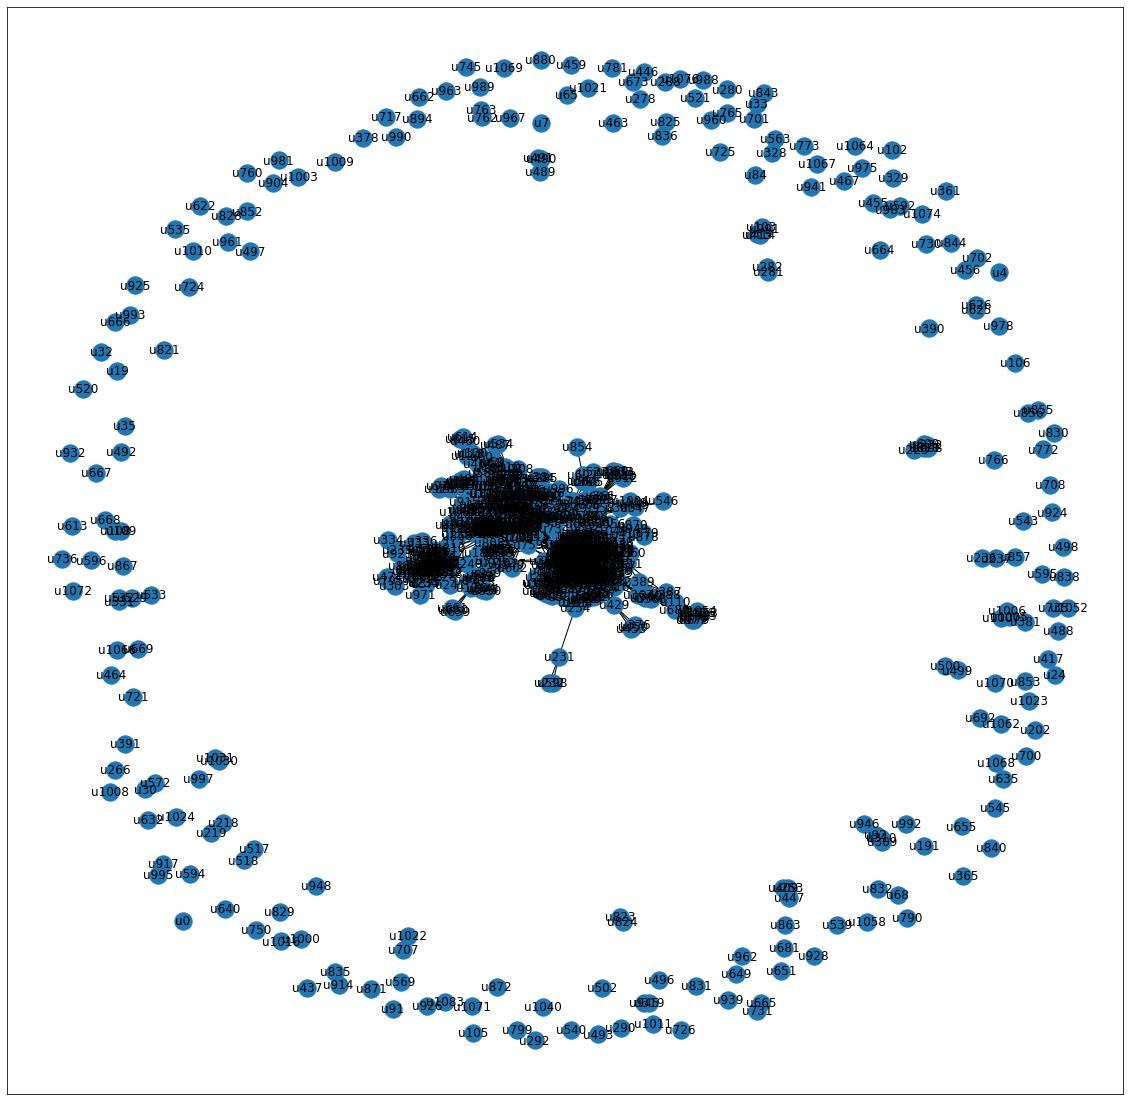

In [20]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G)
plt.show()

In [0]:
from networkx.algorithms.bipartite.centrality import degree_centrality, betweenness_centrality, closeness_centrality

deg_centrality_top_5 = sorted(list(degree_centrality(B,top_nodes).items()), key=lambda x:x[1],reverse=True)[:5]
bet_centrality_top_5 = sorted(list(betweenness_centrality(B,top_nodes).items()), key=lambda x:x[1],reverse=True)[:5]
clsness_centrality_top_5 = sorted(list(closeness_centrality(B,top_nodes).items()), key=lambda x:x[1],reverse=True)[:5]

In [22]:
print('deg: {} \n bet: {} \n closeness: {}'.format(deg_centrality_top_5,bet_centrality_top_5,clsness_centrality_top_5))

deg: [('r190', 0.0792626728110599), ('r105', 0.06267281105990784), ('r172', 0.04976958525345622), ('u40', 0.047213622291021676), ('u28', 0.045278637770897835)] 
 bet: [('u14', 0.16060941462114212), ('r1746', 0.08682875555082936), ('u12', 0.08172927029559415), ('r105', 0.0751193200447641), ('u286', 0.0725064847275238)] 
 closeness: [('r1692', 1.704198473282443), ('r2208', 1.704198473282443), ('r94', 1.704198473282443), ('r334', 1.704198473282443), ('r2156', 1.704198473282443)]


In [0]:
from networkx.algorithms.distance_measures import eccentricity

from networkx.algorithms.centrality import eigenvector_centrality
eigen_centrality_top_5 = sorted(list(eigenvector_centrality(B).items()),  key=lambda x:x[1],reverse=True)[:5]

In [27]:
eigen_centrality_top_5

[('r190', 0.2884837124715093),
 ('u28', 0.2688352403106387),
 ('r105', 0.22289752330929094),
 ('u11', 0.18614687544233507),
 ('r172', 0.1811220972226101)]

In [103]:
sorted(list(closeness_centrality(B,top_nodes).items()), key=lambda x:x[1],reverse=True)[:15]

[('r1668', 1.7219827586206897),
 ('r1208', 1.7219827586206897),
 ('r5423', 1.7219827586206897),
 ('r2132', 1.7219827586206897),
 ('r4761', 1.7219827586206897),
 ('r986', 1.7219827586206897),
 ('r5661', 1.7219827586206897),
 ('r4636', 1.7219827586206897),
 ('r818', 1.7219827586206897),
 ('r2442', 1.7219827586206897),
 ('r4427', 1.7219827586206897),
 ('r4982', 1.7219827586206897),
 ('r4898', 1.7219827586206897),
 ('r5120', 1.7219827586206897),
 ('r1682', 1.7219827586206897)]

In [104]:
bipartite.spectral_bipartivity(B)

1.0

In [28]:

sorted(list(nx.pagerank(B, alpha=0.9).items()), key=lambda x:x[1],reverse=True)[:5]

[('u40', 0.012933890520679978),
 ('u28', 0.00910890024209551),
 ('u5', 0.008903488464594258),
 ('u14', 0.007369207288081471),
 ('u21', 0.006331789681896818)]

In [107]:

sorted(list(bipartite.clustering(B).items()), key=lambda x:x[1],reverse=True)[:5]

[('u212', 1.0), ('u213', 1.0), ('u604', 1.0), ('u605', 1.0), ('u829', 1.0)]

In [42]:
type(df['entities'][0])

str

In [0]:
import re
import spacy

In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
row_toks = []
for doc in df['entities']:
  row_toks.append([token.text for token in nlp(doc) if not token.is_punct])
df_entities = pd.DataFrame(pd.Series(row_toks),columns=['entities'])

In [0]:
import itertools

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 17 columns):
Unnamed: 0       19000 non-null int64
_id              19000 non-null object
originality      19000 non-null int64
value            19000 non-null int64
nutrition        19000 non-null int64
presentation     19000 non-null int64
taste            19000 non-null int64
text             19000 non-null object
dish             19000 non-null object
type             19000 non-null object
user             19000 non-null object
restaurant       19000 non-null object
overall          19000 non-null float64
entities         19000 non-null object
user_remapped    19000 non-null object
dish_remapped    19000 non-null object
rest_remapped    19000 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 2.5+ MB


In [67]:
for index, row in df_entities.head(2).iterrows():
    entities=row['entities']
    print(len(entities))

8
3


In [72]:
source = []
target = []
for index, row in df_entities.iterrows():
    entities=row['entities']
    entities_len = len(entities)
    for n in list(itertools.combinations(entities, 2)):
        source.append(n[0])
        target.append(n[1])
df_co_occ = pd.DataFrame(list(zip(source, target)))
df_co_occ.columns = ['source','target']
df_co_occ.head(10)

,source,target
0,almonds,breakfast
1,almonds,cream_cheese
2,almonds,multigrain
3,almonds,pumpkin
4,almonds,pumpkin_seeds
5,almonds,sautéed_mushrooms
6,almonds,sweet_potato
7,breakfast,cream_cheese
8,breakfast,multigrain
9,breakfast,pumpkin


In [0]:
#df_co_occ.groupby(['source', 'target']).size()

df_co_occ = pd.DataFrame({'count' : df_co_occ.groupby(['source', 'target']).size()}).reset_index()


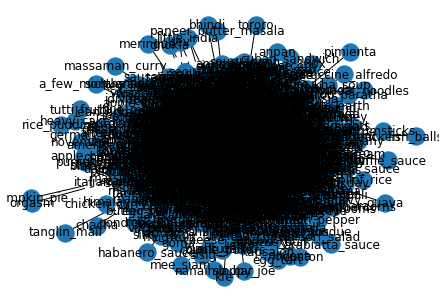

In [76]:
g = nx.from_pandas_edgelist(df_co_occ, source='source', target='target', edge_attr='count')

pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True)
labels = nx.get_edge_attributes(g, 'count')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
plt.show()

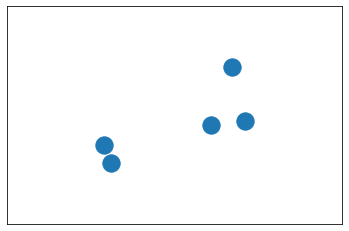

In [97]:
nx.d
draw_networkx_nodes(g,pos=pos,nodelist=['vegan','sauce','tofu','mushrooms','rice'],)

In [78]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 1664
Number of edges: 43242
Average degree:  51.9736


In [95]:
eigen_centrality_top_5 = sorted(list(eigenvector_centrality(g).items()),  key=lambda x:x[1],reverse=True)[:30]
eigen_centrality_top_5

[('vegan', 0.14345496438063676),
 ('vegetables', 0.11902322154470205),
 ('sauce', 0.11701063092006174),
 ('nice', 0.11585264332609907),
 ('salad', 0.11081971332700377),
 ('tofu', 0.11080498445858776),
 ('mushrooms', 0.11078770066777094),
 ('rice', 0.10571965224410057),
 ('tomato', 0.10251552706673112),
 ('vegetarian', 0.10089818877958709),
 ('$', 0.10084737365661514),
 ('avocado', 0.09739679510268708),
 ('first', 0.09629105121303219),
 ('cheese', 0.09453186474522958),
 ('onion', 0.09251808582225791),
 ('egg', 0.08944625801726609),
 ('burger', 0.08845134594756872),
 ('meat', 0.08777584552509922),
 ('coconut', 0.08772640025493668),
 ('potato', 0.08756065489504936),
 ('2', 0.08669279015059272),
 ('two', 0.08667509508929958),
 ('bread', 0.08647882105305549),
 ('carrot', 0.08614613240534437),
 ('lunch', 0.08390487871850391),
 ('singapore', 0.08372263154242582),
 ('soup', 0.08121979168298181),
 ('cucumber', 0.08095321484983539),
 ('spinach', 0.08071515918261436),
 ('lettuce', 0.0786912029381

In [80]:
!pip install pyvis

In [0]:
from pyvis import network as net

In [0]:
vg = net.Network(notebook=True)
vg.from_nx(g)

In [0]:
vg.show('a.html')

In [90]:
#vg.enable_physics(True)
vg.show("mygraph.html")

In [0]:
nx.write_gexf(g, "entities.gexf")

In [77]:
df_user_rest.query('target == "r213"')

,source,target,weight
516,u2,r213,1.00
517,u29,r213,0.80
518,u123,r213,1.00
519,u85,r213,0.72
520,u3,r213,0.88
521,u31,r213,0.80
522,u21,r213,0.76
523,u124,r213,1.00
524,u125,r213,1.00
525,u112,r213,0.84


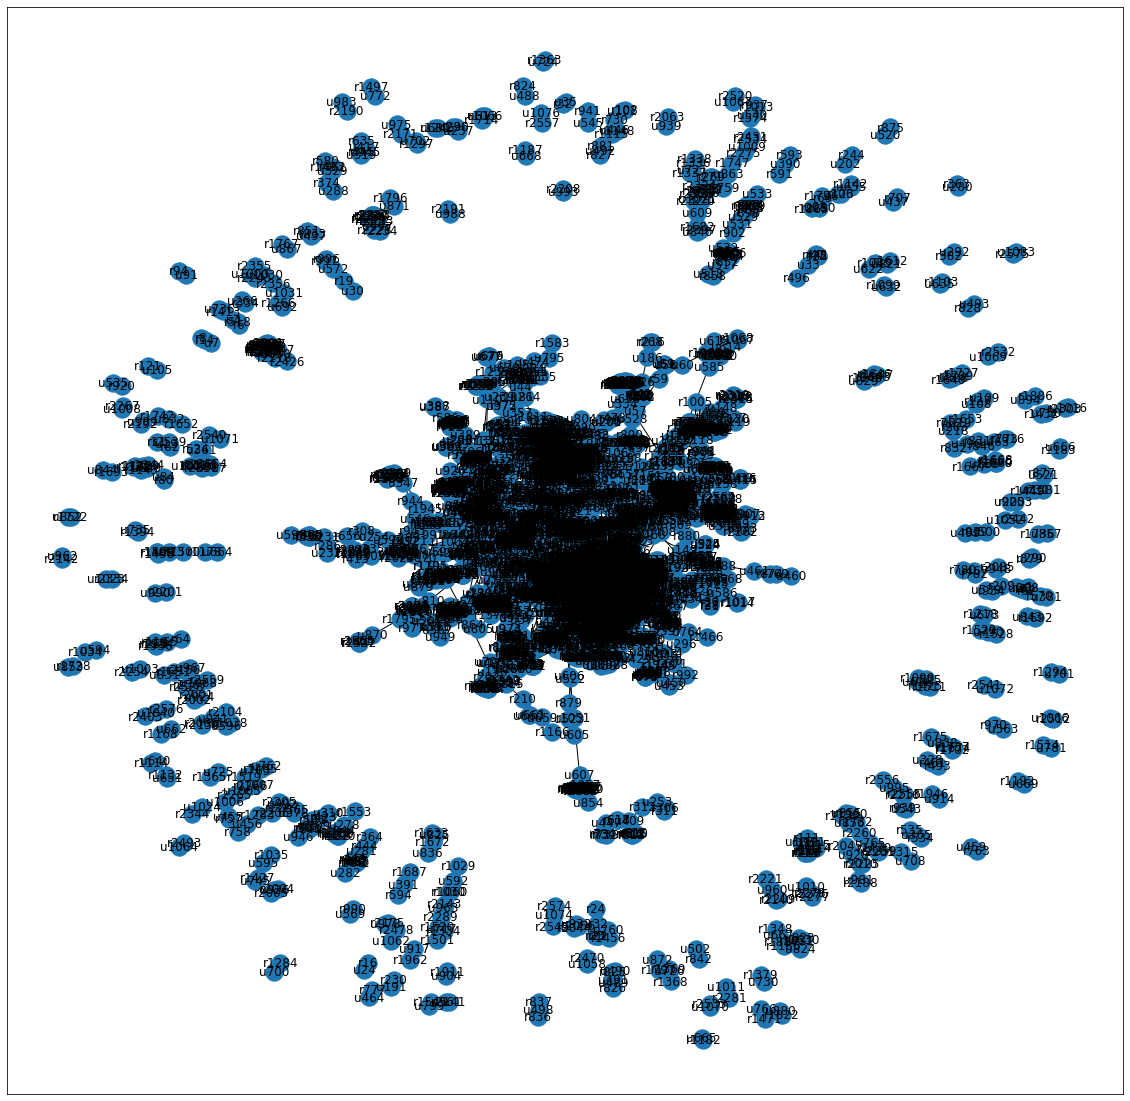

In [24]:
plt.figure(figsize=(20,20))
nx.draw_networkx(B)
plt.show()

In [12]:
list(df_user_rest['source'].unique())

['u0',
 'u1',
 'u2',
 'u3',
 'u4',
 'u5',
 'u6',
 'u7',
 'u8',
 'u9',
 'u10',
 'u11',
 'u12',
 'u13',
 'u14',
 'u15',
 'u16',
 'u17',
 'u18',
 'u19',
 'u20',
 'u21',
 'u22',
 'u23',
 'u24',
 'u25',
 'u26',
 'u27',
 'u28',
 'u29',
 'u30',
 'u31',
 'u32',
 'u33',
 'u34',
 'u35',
 'u36',
 'u37',
 'u38',
 'u39',
 'u40',
 'u41',
 'u42',
 'u43',
 'u44',
 'u45',
 'u46',
 'u47',
 'u48',
 'u49',
 'u50',
 'u51',
 'u52',
 'u53',
 'u54',
 'u55',
 'u56',
 'u57',
 'u58',
 'u59',
 'u60',
 'u61',
 'u62',
 'u63',
 'u64',
 'u65',
 'u66',
 'u67',
 'u68',
 'u69',
 'u70',
 'u71',
 'u72',
 'u73',
 'u74',
 'u75',
 'u76',
 'u77',
 'u78',
 'u79',
 'u80',
 'u81',
 'u82',
 'u83',
 'u84',
 'u85',
 'u86',
 'u87',
 'u88',
 'u89',
 'u90',
 'u91',
 'u92',
 'u93',
 'u94',
 'u95',
 'u96',
 'u97',
 'u98',
 'u99',
 'u100',
 'u101',
 'u102',
 'u103',
 'u104',
 'u105',
 'u106',
 'u107',
 'u108',
 'u109',
 'u110',
 'u111',
 'u112',
 'u113',
 'u114',
 'u115',
 'u116',
 'u117',
 'u118',
 'u119',
 'u120',
 'u121',
 'u122',
 'u

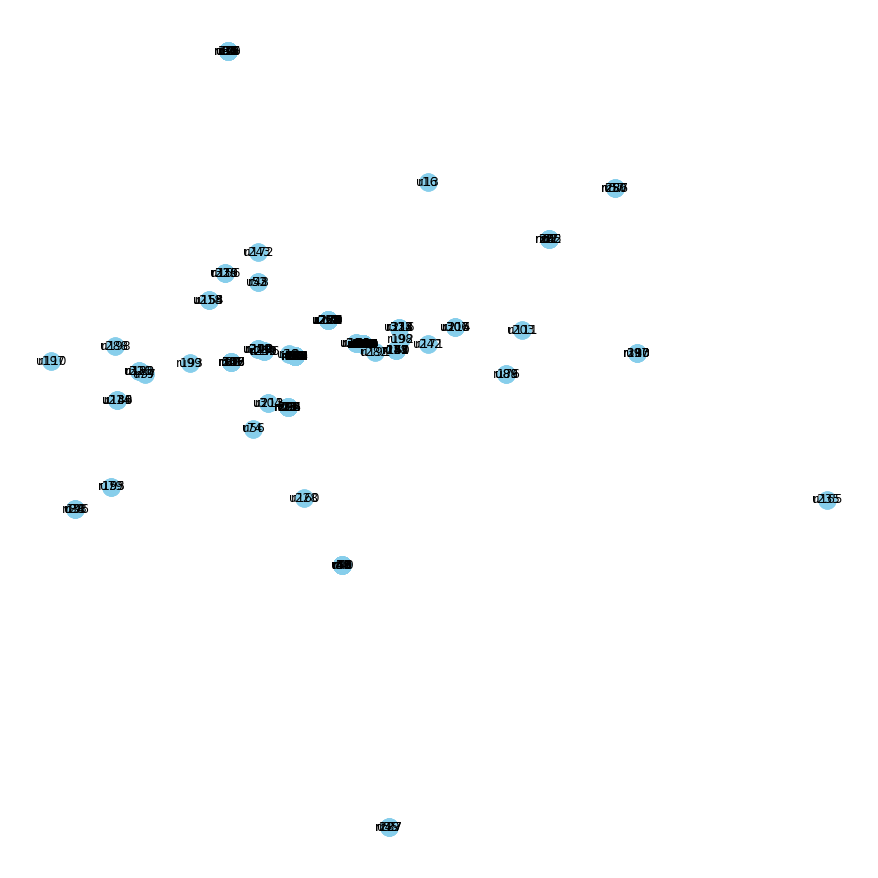

In [17]:
user_rest = nx.from_pandas_edgelist(df_user_rest,'source','target',['weight'])
plt.figure(figsize=(12,12))

pos = nx.spectral_layout(user_rest)
#pos = nx.spectral_layout(G)
nx.draw(user_rest, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos,edge_labels=True)
plt.show()

In [0]:
from networkx.algorithms.centrality import degree_centrality
deg_cen = degree_centrality(user_rest)

In [58]:
df_user_rest['deg_cen'] = df_user_rest['source'].map(deg_cen)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
top10_user_rest = list(df_user_rest[['source','deg_cen']].drop_duplicates().sort_values(['deg_cen'],ascending=False).reset_index(drop=True)['source'][:10])
top10_user_rest
top20_user_rest = list(df_user_rest[['source','deg_cen']].drop_duplicates().sort_values(['deg_cen'],ascending=False).reset_index(drop=True)['source'][:20])

In [82]:
top20_user_rest

['u0',
 'u8',
 'u6',
 'u55',
 'u1',
 'u38',
 'u184',
 'u45',
 'u11',
 'u40',
 'u9',
 'u17',
 'u7',
 'u177',
 'u22',
 'u66',
 'u31',
 'u35',
 'u78',
 'u30']

In [73]:
df_user_rest.query('source in @top10_user_rest')

,source,target,weight,deg_cen
0,u0,r0,0.76,0.079365
1,u0,r0,0.64,0.079365
2,u1,r1,0.92,0.026455
3,u0,r2,0.56,0.079365
9,u6,r5,0.76,0.051146
...,...,...,...,...
995,u8,r335,0.96,0.056437
996,u8,r335,0.56,0.056437
997,u1,r336,0.96,0.026455
998,u1,r337,0.56,0.026455


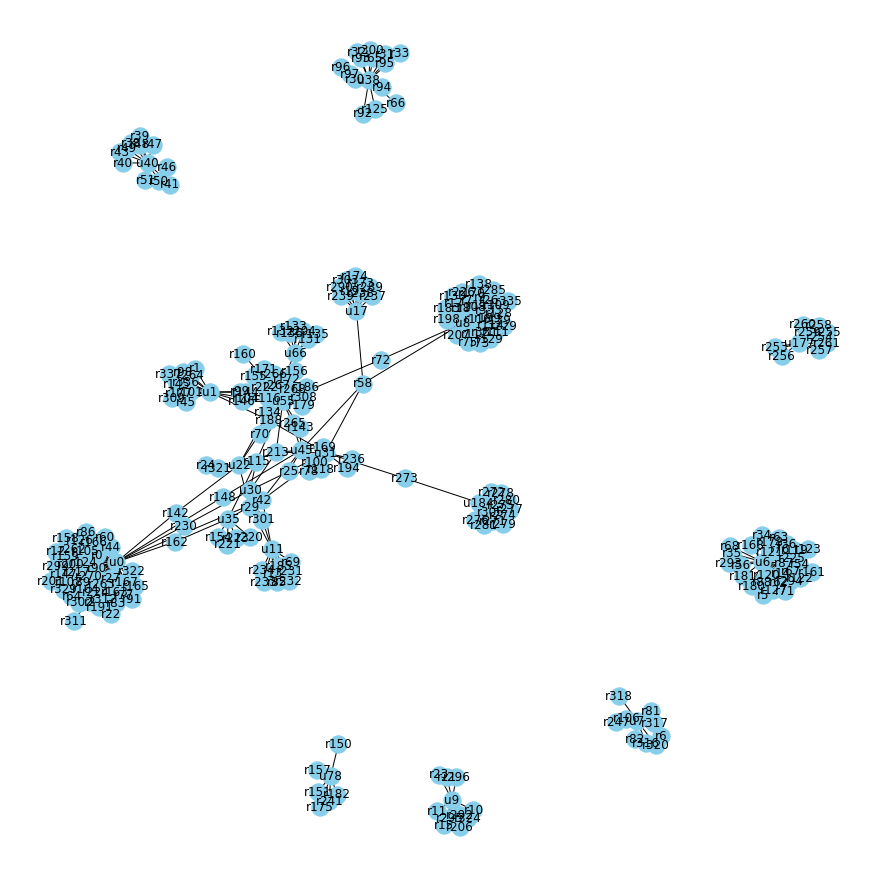

In [84]:
user_rest = nx.from_pandas_edgelist(df_user_rest.query('source in @top20_user_rest'),'source','target',['weight'])
plt.figure(figsize=(12,12))

pos = nx.spring_layout(user_rest)
nx.draw(user_rest, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos,edge_labels=True)
plt.show()

In [56]:
deg_cen['u0']

0.07936507936507936

In [52]:
p_dict = nx.pagerank(user_rest, alpha=0.9)
p_dict

{'r0': 0.0009247161349677137,
 'r1': 0.0008274323289825654,
 'r10': 0.0009294008989182009,
 'r100': 0.0016384328578068744,
 'r101': 0.0008840737195003391,
 'r102': 0.0008682492828055668,
 'r103': 0.000941111698045293,
 'r104': 0.0014373725224431926,
 'r105': 0.0008311336603502705,
 'r106': 0.0010537654244441883,
 'r107': 0.0006907599484241061,
 'r108': 0.002642087099921718,
 'r109': 0.0008664440734334615,
 'r11': 0.0009652744494367739,
 'r110': 0.0009605878555341833,
 'r111': 0.0009605878555341833,
 'r112': 0.0009605878555341833,
 'r113': 0.0008978253341337019,
 'r114': 0.0009605878555341833,
 'r115': 0.008843686478841482,
 'r116': 0.0008426379220065696,
 'r117': 0.0009921406175445694,
 'r118': 0.0014154850163358864,
 'r119': 0.0009379212494848475,
 'r12': 0.0011616819178250136,
 'r120': 0.0010181175559539715,
 'r121': 0.0011384120156576573,
 'r122': 0.0008978230962502854,
 'r123': 0.0006171360236083513,
 'r124': 0.0008311336603502705,
 'r125': 0.0006320747428342235,
 'r126': 0.0007375

In [31]:
type(user_rest)

networkx.classes.graph.Graph

In [0]:
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
from networkx.algorithms.hierarchy import flow_hierarchy
from networkx.algorithms import community

communities_generator = community.girvan_newman(user_rest)

In [41]:
user_rest.degree['u49']

3

In [33]:
top_level_communities = next(communities_generator)
top_level_communities

({'r0',
  'r1',
  'r100',
  'r101',
  'r102',
  'r103',
  'r104',
  'r105',
  'r107',
  'r115',
  'r116',
  'r117',
  'r118',
  'r12',
  'r124',
  'r126',
  'r13',
  'r131',
  'r132',
  'r133',
  'r134',
  'r135',
  'r136',
  'r141',
  'r142',
  'r143',
  'r144',
  'r145',
  'r146',
  'r147',
  'r148',
  'r149',
  'r152',
  'r154',
  'r155',
  'r156',
  'r158',
  'r159',
  'r160',
  'r162',
  'r163',
  'r164',
  'r165',
  'r166',
  'r167',
  'r171',
  'r172',
  'r173',
  'r174',
  'r177',
  'r179',
  'r184',
  'r185',
  'r186',
  'r188',
  'r189',
  'r19',
  'r191',
  'r194',
  'r2',
  'r200',
  'r201',
  'r204',
  'r208',
  'r213',
  'r215',
  'r216',
  'r217',
  'r22',
  'r220',
  'r221',
  'r222',
  'r223',
  'r224',
  'r230',
  'r231',
  'r232',
  'r233',
  'r234',
  'r236',
  'r237',
  'r238',
  'r239',
  'r24',
  'r245',
  'r246',
  'r248',
  'r25',
  'r262',
  'r263',
  'r264',
  'r265',
  'r266',
  'r267',
  'r268',
  'r269',
  'r27',
  'r270',
  'r271',
  'r272',
  'r273',
  '

In [42]:
next_level_communities = next(communities_generator)
next_level_communities

({'r0',
  'r1',
  'r100',
  'r101',
  'r102',
  'r103',
  'r104',
  'r105',
  'r107',
  'r115',
  'r116',
  'r117',
  'r118',
  'r12',
  'r124',
  'r126',
  'r13',
  'r131',
  'r132',
  'r133',
  'r134',
  'r135',
  'r136',
  'r141',
  'r142',
  'r143',
  'r144',
  'r145',
  'r146',
  'r147',
  'r148',
  'r149',
  'r152',
  'r154',
  'r155',
  'r156',
  'r158',
  'r159',
  'r160',
  'r162',
  'r163',
  'r164',
  'r165',
  'r166',
  'r167',
  'r171',
  'r172',
  'r173',
  'r174',
  'r177',
  'r179',
  'r184',
  'r185',
  'r186',
  'r188',
  'r189',
  'r19',
  'r191',
  'r194',
  'r2',
  'r200',
  'r201',
  'r204',
  'r208',
  'r213',
  'r215',
  'r216',
  'r217',
  'r22',
  'r220',
  'r221',
  'r222',
  'r223',
  'r224',
  'r230',
  'r231',
  'r232',
  'r233',
  'r234',
  'r236',
  'r237',
  'r238',
  'r239',
  'r24',
  'r245',
  'r246',
  'r248',
  'r25',
  'r262',
  'r263',
  'r264',
  'r265',
  'r266',
  'r267',
  'r268',
  'r269',
  'r27',
  'r270',
  'r289',
  'r29',
  'r290',
  'r

In [43]:
sorted(map(sorted, next_level_communities))

[['r0',
  'r1',
  'r100',
  'r101',
  'r102',
  'r103',
  'r104',
  'r105',
  'r107',
  'r115',
  'r116',
  'r117',
  'r118',
  'r12',
  'r124',
  'r126',
  'r13',
  'r131',
  'r132',
  'r133',
  'r134',
  'r135',
  'r136',
  'r141',
  'r142',
  'r143',
  'r144',
  'r145',
  'r146',
  'r147',
  'r148',
  'r149',
  'r152',
  'r154',
  'r155',
  'r156',
  'r158',
  'r159',
  'r160',
  'r162',
  'r163',
  'r164',
  'r165',
  'r166',
  'r167',
  'r171',
  'r172',
  'r173',
  'r174',
  'r177',
  'r179',
  'r184',
  'r185',
  'r186',
  'r188',
  'r189',
  'r19',
  'r191',
  'r194',
  'r2',
  'r200',
  'r201',
  'r204',
  'r208',
  'r213',
  'r215',
  'r216',
  'r217',
  'r22',
  'r220',
  'r221',
  'r222',
  'r223',
  'r224',
  'r230',
  'r231',
  'r232',
  'r233',
  'r234',
  'r236',
  'r237',
  'r238',
  'r239',
  'r24',
  'r245',
  'r246',
  'r248',
  'r25',
  'r262',
  'r263',
  'r264',
  'r265',
  'r266',
  'r267',
  'r268',
  'r269',
  'r27',
  'r270',
  'r289',
  'r29',
  'r290',
  'r

In [21]:
min = 1
max = 0
for k, v in p_dict.items():
  if v > max:
    max = v
    maxp = k
  if v < min:
    min = v
    minp = k


print(maxp,max)
print(minp,min)

u0 0.02875502718552056
r160 0.0003093726548238491


In [0]:
from networkx.algorithms.community import k_clique_communities
G = nx.complete_graph(5)
K5 = nx.convert_node_labels_to_integers(G,first_label=2)
G.add_edges_from(K5.edges())
c = list(k_clique_communities(G, 4))


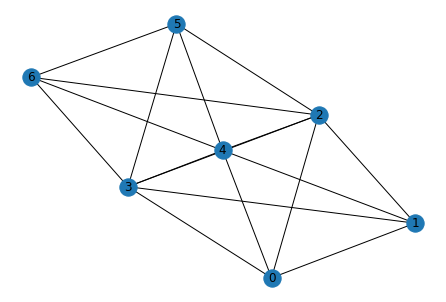

In [25]:
nx.draw(G,with_labels=True)

In [44]:
df_dish_rest['weight'] = df_dish_rest['weight']/5
df_dish_rest.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,source,target,weight
0,d0,r0,0.76
1,d1,r0,0.64
2,d2,r1,0.92
3,d3,r2,0.56
4,d4,r3,0.96


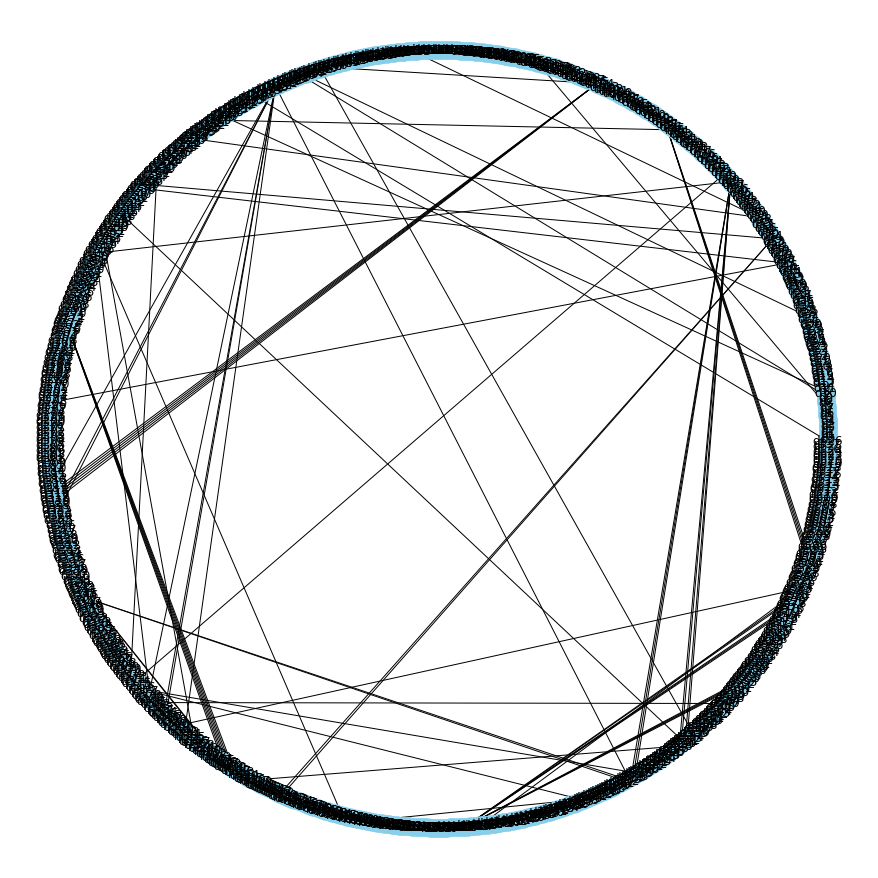

In [51]:
dish_rest = nx.from_pandas_edgelist(df_dish_rest,'source','target',['weight'])
plt.figure(figsize=(12,12))

pos = nx.circular_layout(dish_rest)
#pos = nx.spectral_layout(G)
nx.draw(dish_rest, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos,edge_labels=True)
plt.show()